# Dataset Information

The dataset used for this challenge is taken from the München Open Data Portal
### Monatszahlen Verkehrsunfälle 
Link : https://opendata.muenchen.de/dataset/monatszahlen-verkehrsunfaelle/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7

The above data provides historical information values on the number of accidents for different categories per month in the 
city of Munich, Germany. 
As the dataset contains several columns, but we will focus on the mentioned first five columns which are important to our mission, hence feature selection is not required here.

Five columns considered:

|Translated Column Name - >| Category    | Accident-type | Year | Month | Value |
|----------------------|-------------|---------------|------|-------|-------|
|Actual Column Name in Dataset ->  | MONATSZAHL  | AUSPRAEGUNG   | JAHR | MONAT | WERT  |

1. Category - (MONATSZAHL)
2. Accident-type - (insgesamt means total for all subcategories) (AUSPRAEGUNG)
3. Year - (JAHR)
4. Month - (MONAT)
5. Value - (WERT)

#### Category Types [ MONATSZAHL ]:
1. 'Alkoholunfälle' - Alcohol accidents
2. 'Fluchtunfälle' - Escape accidents
3. 'Verkehrsunfälle' - Traffic Accidents

#### Accident Types [ AUSPRAEGUNG ]:
1. 'insgesamt' - total
2. 'mit personenschäden' - personal injury
3. 'Verletzte und Getötete' - injured and killed

----

# Importing Libraries, Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler

In [3]:
df = pd.read_csv("data/monatszahlen2209_verkehrsunfaelle.csv")
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONATSZAHL                     2086 non-null   object 
 1   AUSPRÄGUNG                     2086 non-null   object 
 2   JAHR                           2086 non-null   int64  
 3   MONAT                          2086 non-null   object 
 4   WERT                           2002 non-null   float64
 5   VORJAHRESWERT                  1995 non-null   float64
 6   VERÄND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERÄND_VORJAHRESMONAT_PROZENT  1910 non-null   float64
 8   ZWÖLF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 146.8+ KB


In [5]:
df.describe()

,JAHR,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
count,2086.000000,2002.000000,1995.000000,1840.000000,1910.000000,1848.000000
mean,2010.963087,1434.433566,1409.676190,5.241538,1.669450,777.310065
std,6.615227,4634.494223,4564.043202,40.926314,30.197125,1164.856446
min,2000.000000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.000000,41.000000,41.000000,-15.540000,-12.500000,40.000000
50%,2011.000000,394.000000,394.000000,0.000000,-1.115000,421.000000
75%,2017.000000,863.250000,859.500000,18.712500,10.262500,814.250000
max,2022.000000,46988.000000,46988.000000,600.000000,425.000000,3977.000000


In [6]:
df['MONATSZAHL'].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [7]:
df['AUSPRÄGUNG'].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [8]:
df['JAHR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000], dtype=int64)

In [9]:
df['MONAT'].unique()

array(['202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202212',
       'Summe', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111',
       '202112', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '20150

# Data Preprocessing

In [10]:
df = df[df['JAHR'] < 2021]

In [11]:
# removing rows where value is null
df['WERT'].isnull().sum()

0

In [12]:
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
26,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [13]:
len(df[df['MONAT'] == 'Summe'])

147

In [14]:
# removing rows where total number of accidents are given as it is not required
df = df[df['MONAT'] != 'Summe']

In [15]:
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
26,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [16]:
# year is present in JAHR column, but in MONAT column both year and month are present
# hence simplyfying it i.e keeping only month in MONAT column
df['MONAT'] = pd.to_numeric(df['MONAT'], errors='coerce')
df['MONAT'] = df['MONAT'] % 100
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
26,Alkoholunfälle,insgesamt,2020,1,28.0,22.0,-20.00,27.27,37.0
27,Alkoholunfälle,insgesamt,2020,2,40.0,28.0,42.86,42.86,38.0
28,Alkoholunfälle,insgesamt,2020,3,27.0,34.0,-32.50,-20.59,37.0
29,Alkoholunfälle,insgesamt,2020,4,26.0,36.0,-3.70,-27.78,36.0
30,Alkoholunfälle,insgesamt,2020,5,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0,NaN,-6.02,NaN,594.0


In [17]:
# converting categorical variables into numerical dummy variables 
df['MONATSZAHL'].replace(['Alkoholunfälle','Fluchtunfälle', 'Verkehrsunfälle'],
                        [0, 1, 2], inplace=True)

In [18]:
df['AUSPRÄGUNG'].replace(['insgesamt','mit Personenschäden', 'Verletzte und Getötete'],
                        [0, 1, 2], inplace=True)

In [19]:
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
26,0,0,2020,1,28.0,22.0,-20.00,27.27,37.0
27,0,0,2020,2,40.0,28.0,42.86,42.86,38.0
28,0,0,2020,3,27.0,34.0,-32.50,-20.59,37.0
29,0,0,2020,4,26.0,36.0,-3.70,-27.78,36.0
30,0,0,2020,5,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
2081,2,2,2000,8,647.0,NaN,-13.04,NaN,584.0
2082,2,2,2000,9,675.0,NaN,4.33,NaN,594.0
2083,2,2,2000,10,615.0,NaN,-8.89,NaN,596.0
2084,2,2,2000,11,578.0,NaN,-6.02,NaN,594.0


In [20]:
df.to_csv('data/preprocessed_data.csv', index=False)

Now that the data is preprocessed, next step is Visualization

---

## Data Visualization

In [21]:
df_visual = pd.read_csv('data/monatszahlen2209_verkehrsunfaelle.csv')

In [22]:
category_totals = df_visual.groupby('MONATSZAHL')['WERT'].sum()

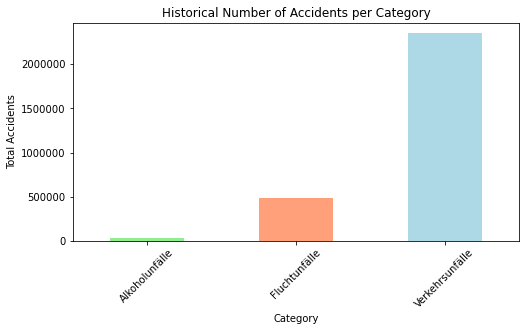

In [23]:
# Bar Chart
plt.figure(figsize=(8, 4))
colors = sns.color_palette(["lightgreen", "lightsalmon", "lightblue"])
category_totals.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Total Accidents')
plt.title('Historical Number of Accidents per Category')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

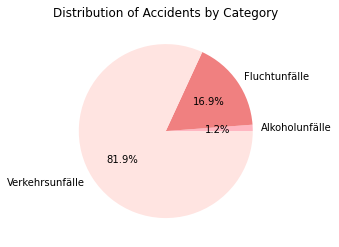

In [24]:
# Pie Chart
plt.figure(figsize=(8, 4))
colors = sns.color_palette(["lightpink", "lightcoral", "mistyrose", "lavenderblush", "pink"])
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Accidents by Category')
plt.show()

<Figure size 576x288 with 0 Axes>

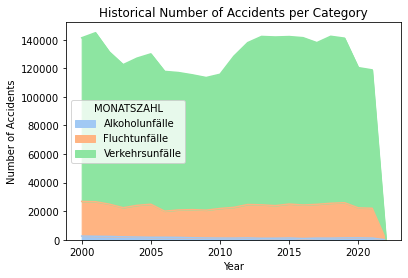

In [25]:
# Stacked Area Chart
plt.figure(figsize=(8, 4))
df_pivot = df_visual.pivot_table(index='JAHR', columns='MONATSZAHL', values='WERT', aggfunc='sum')
colors = sns.color_palette("pastel")
df_pivot.plot.area(stacked=True, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Historical Number of Accidents per Category')
plt.show()

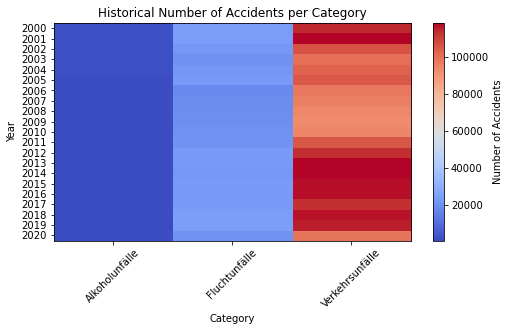

In [26]:
# Heat Map
df_visual_filtered = df_visual[df_visual['JAHR'] <= 2020]
plt.figure(figsize=(8, 4))
df_pivot = df_visual_filtered.pivot_table(index='JAHR', columns='MONATSZAHL', values='WERT', aggfunc='sum')
plt.imshow(df_pivot.values, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Number of Accidents')
plt.xlabel('Category')
plt.ylabel('Year')
plt.title('Historical Number of Accidents per Category')
years = df_pivot.index.astype(int)
plt.yticks(np.arange(len(years)), years)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation=45)
plt.show()

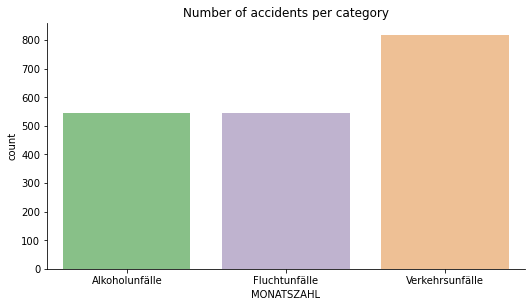

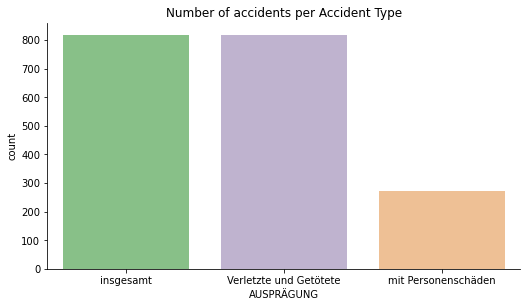

In [27]:
# Plotting Number of accidents per category
plot = sns.catplot(x="MONATSZAHL", kind="count", data=df_visual_filtered, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(8, 4)

# Plotting Number of accidents per Accident Type
plot = sns.catplot(x="AUSPRÄGUNG", kind="count", data=df_visual_filtered, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(8, 4)

---

## Dividing Dataset into features and label

In [28]:
# Separating the label (WERT) from the features
# using only 4 important features as mentioned in the challenge description

In [29]:
features_df = df[['MONATSZAHL','AUSPRÄGUNG','JAHR','MONAT']].values
label_df = df[['WERT']].values

In [30]:
features_df

array([[   0,    0, 2020,    1],
       [   0,    0, 2020,    2],
       [   0,    0, 2020,    3],
       ...,
       [   2,    2, 2000,   10],
       [   2,    2, 2000,   11],
       [   2,    2, 2000,   12]], dtype=int64)

In [31]:
label_df

array([[ 28.],
       [ 40.],
       [ 27.],
       ...,
       [615.],
       [578.],
       [515.]])

In [32]:
# converting label to int as number of accidents can't be float
label_df = label_df.astype(int)
label_df

array([[ 28],
       [ 40],
       [ 27],
       ...,
       [615],
       [578],
       [515]])

In [33]:
features_df.shape

(1764, 4)

In [34]:
label_df.shape

(1764, 1)

---

# Models

---

## Linear Regression

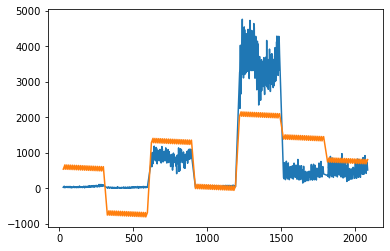

In [35]:
#checking how LR performs on whole dataset
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(features_df,label_df)
pred_lr=lr.predict(features_df)
plt.plot(df.index,label_df)
plt.plot(df.index,pred_lr)
plt.show()

In [36]:
# saving the model
with open("models/LR_Model.pkl","wb") as f:
    pickle.dump(lr,f)

In [37]:
from joblib import dump, load
dump(lr , 'models/LR_Model.joblib')
print("Linear Regression prediction for Alkoholunfalle,insgesamt,2021,01"+str(lr.predict([[0,0,2021,1]])))

Linear Regression prediction for Alkoholunfalle,insgesamt,2021,01[[540.94670561]]


In [38]:
# LR does not at give proper acceptable outcome, hence moving forward

---


## Naive Bayes

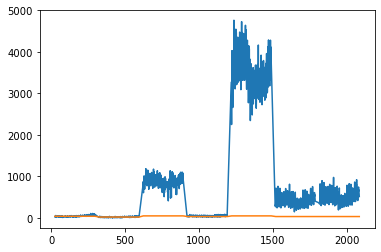

In [39]:
#checking how NB performs on whole dataset
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(features_df, label_df)
pred_nb=nb.predict(features_df)
plt.plot(df.index,label_df)
plt.plot(df.index,pred_nb)
plt.show()

In [40]:
with open("models/NB_Model.pkl","wb") as f:
    pickle.dump(nb,f)

In [41]:
from joblib import dump, load
dump(nb , 'models/NB_Model.joblib')
print("Naive Bayes prediction for Alkoholunfalle,insgesamt,2021,01 : "+str(nb.predict([[0,0,2021,1]])))

Naive Bayes prediction for Alkoholunfalle,insgesamt,2021,01 : [40]


In [42]:
# the graph of naive bayes doesn't give a good idea 

---

## Random Forest

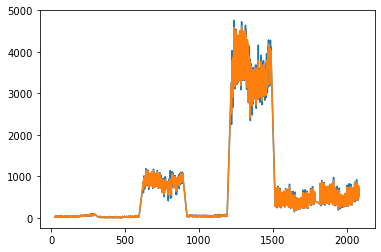

In [43]:
#checking how RF performs on whole dataset
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(features_df,label_df)
pred_rf=rf.predict(features_df)
plt.plot(df.index,label_df)
plt.plot(df.index,pred_rf)
plt.show()

In [44]:
with open("models/RF_Model.pkl","wb") as f:
    pickle.dump(rf,f)

In [45]:
from joblib import dump, load
dump(rf , 'models/RF_Model.joblib')
print("Random Forest Regressor prediction for Alkoholunfalle,insgesamt,2021,01 : "+str(rf.predict([[0,0,2021,1]])))

Random Forest Regressor prediction for Alkoholunfalle,insgesamt,2021,01 : [28.07]


In [46]:
# Random Forest gives Decent Enough Prediction

## Exploring Neural Networks

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(features_df, label_df, test_size=0.2, random_state=42)

In [48]:
len(x_train)

1411

In [49]:
len(x_valid)

353

In [50]:
len(y_train)

1411

In [51]:
len(y_valid)

353

In [52]:
input_dim_df = x_train.shape[1]
print(input_dim_df)

4


In [53]:
# learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch < 200:
        return lr
    elif epoch < 400:
        return lr * 0.1
    else:
        return lr * 0.01

In [61]:
model = Sequential()
model.add(GRU(256, activation='relu', input_shape=(input_dim_df, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(x_train, y_train, epochs=500, verbose=1, validation_data=(x_valid, y_valid), callbacks=[lr_scheduler])

# Evaluate the model
loss = model.evaluate(x_valid, y_valid)

Epoch 1/500
45/45 [==============================] - 6s 23ms/step - loss: 2057256.6250 - val_loss: 7229863.5000 - lr: 0.0100
Epoch 2/500
45/45 [==============================] - 1s 12ms/step - loss: 2025004.8750 - val_loss: 1720581.6250 - lr: 0.0100
Epoch 3/500
45/45 [==============================] - 1s 13ms/step - loss: 1963996.6250 - val_loss: 1843899.5000 - lr: 0.0100
Epoch 4/500
45/45 [==============================] - 1s 14ms/step - loss: 1878652.8750 - val_loss: 2539321.2500 - lr: 0.0100
Epoch 5/500
45/45 [==============================] - 1s 14ms/step - loss: 1771993.3750 - val_loss: 40086280.0000 - lr: 0.0100
Epoch 6/500
45/45 [==============================] - 1s 15ms/step - loss: 1648783.3750 - val_loss: 1175275.3750 - lr: 0.0100
Epoch 7/500
45/45 [==============================] - 1s 14ms/step - loss: 1498461.7500 - val_loss: 1446181.6250 - lr: 0.0100
Epoch 8/500
45/45 [==============================] - 1s 18ms/step - loss: 1339120.8750 - val_loss: 2460286.7500 - lr: 0.0100

45/45 [==============================] - 1s 21ms/step - loss: 187724.3125 - val_loss: 37344.2422 - lr: 0.0100
Epoch 68/500
45/45 [==============================] - 1s 19ms/step - loss: 188677.7500 - val_loss: 35608.0469 - lr: 0.0100
Epoch 69/500
45/45 [==============================] - 1s 17ms/step - loss: 188087.2969 - val_loss: 34626.4023 - lr: 0.0100
Epoch 70/500
45/45 [==============================] - 1s 15ms/step - loss: 212956.5781 - val_loss: 48231.2109 - lr: 0.0100
Epoch 71/500
45/45 [==============================] - 1s 15ms/step - loss: 158259.2812 - val_loss: 45707.6328 - lr: 0.0100
Epoch 72/500
45/45 [==============================] - 1s 14ms/step - loss: 227706.5312 - val_loss: 39991.5820 - lr: 0.0100
Epoch 73/500
45/45 [==============================] - 1s 14ms/step - loss: 166811.2656 - val_loss: 37552.1328 - lr: 0.0100
Epoch 74/500
45/45 [==============================] - 1s 16ms/step - loss: 211289.9844 - val_loss: 706088.1875 - lr: 0.0100
Epoch 75/500
45/45 [========

45/45 [==============================] - 1s 18ms/step - loss: 150894.1562 - val_loss: 44970.1133 - lr: 0.0100
Epoch 134/500
45/45 [==============================] - 1s 26ms/step - loss: 176507.2500 - val_loss: 40180.6445 - lr: 0.0100
Epoch 135/500
45/45 [==============================] - 1s 21ms/step - loss: 199458.1250 - val_loss: 38597.2617 - lr: 0.0100
Epoch 136/500
45/45 [==============================] - 1s 25ms/step - loss: 166646.5938 - val_loss: 35302.6914 - lr: 0.0100
Epoch 137/500
45/45 [==============================] - 1s 24ms/step - loss: 199248.8281 - val_loss: 41620.5703 - lr: 0.0100
Epoch 138/500
45/45 [==============================] - 1s 21ms/step - loss: 179203.1094 - val_loss: 40346.8828 - lr: 0.0100
Epoch 139/500
45/45 [==============================] - 1s 24ms/step - loss: 186932.4844 - val_loss: 50895.5938 - lr: 0.0100
Epoch 140/500
45/45 [==============================] - 1s 22ms/step - loss: 199674.1875 - val_loss: 63537.1992 - lr: 0.0100
Epoch 141/500
45/45 [=

45/45 [==============================] - 1s 18ms/step - loss: 227663.4688 - val_loss: 142929344.0000 - lr: 0.0100
Epoch 199/500
45/45 [==============================] - 1s 17ms/step - loss: 199786.1562 - val_loss: 81011672.0000 - lr: 0.0100
Epoch 200/500
45/45 [==============================] - 1s 17ms/step - loss: 201047.0625 - val_loss: 13080654.0000 - lr: 0.0100
Epoch 201/500
45/45 [==============================] - 1s 17ms/step - loss: 187716.2500 - val_loss: 11246505.0000 - lr: 1.0000e-03
Epoch 202/500
45/45 [==============================] - 1s 18ms/step - loss: 189240.6562 - val_loss: 15493684.0000 - lr: 1.0000e-04
Epoch 203/500
45/45 [==============================] - 1s 18ms/step - loss: 194913.2031 - val_loss: 15692627.0000 - lr: 1.0000e-05
Epoch 204/500
45/45 [==============================] - 1s 18ms/step - loss: 159112.0469 - val_loss: 12305491.0000 - lr: 1.0000e-06
Epoch 205/500
45/45 [==============================] - 1s 19ms/step - loss: 184453.6875 - val_loss: 7726265.

Epoch 262/500
45/45 [==============================] - 1s 15ms/step - loss: 208438.6406 - val_loss: 42982.8789 - lr: 0.0000e+00
Epoch 263/500
45/45 [==============================] - 1s 15ms/step - loss: 178510.5000 - val_loss: 43731.8516 - lr: 0.0000e+00
Epoch 264/500
45/45 [==============================] - 1s 16ms/step - loss: 181354.5625 - val_loss: 43377.5977 - lr: 0.0000e+00
Epoch 265/500
45/45 [==============================] - 1s 15ms/step - loss: 208524.1406 - val_loss: 43729.4180 - lr: 0.0000e+00
Epoch 266/500
45/45 [==============================] - 1s 15ms/step - loss: 213620.0469 - val_loss: 43656.6836 - lr: 0.0000e+00
Epoch 267/500
45/45 [==============================] - 1s 15ms/step - loss: 187437.3906 - val_loss: 42553.3359 - lr: 0.0000e+00
Epoch 268/500
45/45 [==============================] - 1s 15ms/step - loss: 207888.7188 - val_loss: 43083.8594 - lr: 0.0000e+00
Epoch 269/500
45/45 [==============================] - 1s 15ms/step - loss: 166695.1094 - val_loss: 4353

45/45 [==============================] - 1s 14ms/step - loss: 166075.8281 - val_loss: 43951.6875 - lr: 0.0000e+00
Epoch 327/500
45/45 [==============================] - 1s 15ms/step - loss: 172756.3906 - val_loss: 44834.2578 - lr: 0.0000e+00
Epoch 328/500
45/45 [==============================] - 1s 15ms/step - loss: 200528.5781 - val_loss: 43982.7422 - lr: 0.0000e+00
Epoch 329/500
45/45 [==============================] - 1s 16ms/step - loss: 194953.9375 - val_loss: 43306.3164 - lr: 0.0000e+00
Epoch 330/500
45/45 [==============================] - 1s 17ms/step - loss: 218624.0156 - val_loss: 44349.1484 - lr: 0.0000e+00
Epoch 331/500
45/45 [==============================] - 1s 17ms/step - loss: 192047.9844 - val_loss: 43983.5430 - lr: 0.0000e+00
Epoch 332/500
45/45 [==============================] - 1s 17ms/step - loss: 184595.2031 - val_loss: 43769.9023 - lr: 0.0000e+00
Epoch 333/500
45/45 [==============================] - 1s 17ms/step - loss: 223512.0469 - val_loss: 43297.9805 - lr: 0

45/45 [==============================] - 1s 13ms/step - loss: 197545.7812 - val_loss: 43333.8906 - lr: 0.0000e+00
Epoch 391/500
45/45 [==============================] - 1s 14ms/step - loss: 192733.9531 - val_loss: 42558.6719 - lr: 0.0000e+00
Epoch 392/500
45/45 [==============================] - 1s 13ms/step - loss: 210179.6094 - val_loss: 41621.1094 - lr: 0.0000e+00
Epoch 393/500
45/45 [==============================] - 1s 13ms/step - loss: 198457.1094 - val_loss: 42977.4062 - lr: 0.0000e+00
Epoch 394/500
45/45 [==============================] - 1s 13ms/step - loss: 186419.4531 - val_loss: 44025.2617 - lr: 0.0000e+00
Epoch 395/500
45/45 [==============================] - 1s 15ms/step - loss: 185493.7188 - val_loss: 42851.7461 - lr: 0.0000e+00
Epoch 396/500
45/45 [==============================] - 1s 15ms/step - loss: 218350.7812 - val_loss: 44844.2383 - lr: 0.0000e+00
Epoch 397/500
45/45 [==============================] - 1s 15ms/step - loss: 204279.6094 - val_loss: 45063.3164 - lr: 0

45/45 [==============================] - 1s 16ms/step - loss: 172735.2031 - val_loss: 43661.6836 - lr: 0.0000e+00
Epoch 455/500
45/45 [==============================] - 1s 15ms/step - loss: 189129.0000 - val_loss: 43676.5664 - lr: 0.0000e+00
Epoch 456/500
45/45 [==============================] - 1s 15ms/step - loss: 164038.2500 - val_loss: 44949.3438 - lr: 0.0000e+00
Epoch 457/500
45/45 [==============================] - 1s 13ms/step - loss: 184201.7188 - val_loss: 45244.9102 - lr: 0.0000e+00
Epoch 458/500
45/45 [==============================] - 1s 14ms/step - loss: 181860.7500 - val_loss: 44844.7578 - lr: 0.0000e+00
Epoch 459/500
45/45 [==============================] - 1s 13ms/step - loss: 211673.4062 - val_loss: 44000.4766 - lr: 0.0000e+00
Epoch 460/500
45/45 [==============================] - 1s 13ms/step - loss: 177355.8750 - val_loss: 42695.4766 - lr: 0.0000e+00
Epoch 461/500
45/45 [==============================] - 1s 13ms/step - loss: 219409.7500 - val_loss: 41906.6484 - lr: 0

In [62]:
# Prediction for Alkoholunfalle,insgesamt,2021,01 thorugh nn model
pre_vec = np.array([[0,0,2021,1]])
model.predict(pre_vec)

1/1 [==============================] - 1s 593ms/step


array([[34.11746]], dtype=float32)

In [66]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
26,0,0,2020,1,28.0,22.0,-20.00,27.27,37.0
27,0,0,2020,2,40.0,28.0,42.86,42.86,38.0
28,0,0,2020,3,27.0,34.0,-32.50,-20.59,37.0
29,0,0,2020,4,26.0,36.0,-3.70,-27.78,36.0
30,0,0,2020,5,40.0,39.0,53.85,2.56,36.0


In [65]:
pre_vec = np.array([[0,0,2020,5]])
model.predict(pre_vec) # //original is 40

1/1 [==============================] - 0s 44ms/step


array([[40.90234]], dtype=float32)

1/1 [==============================] - 0s 33ms/step


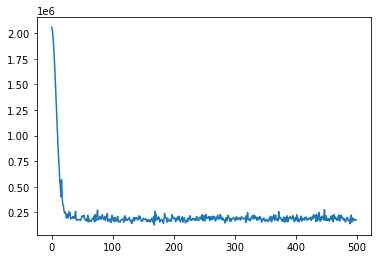

In [67]:
model.predict(pre_vec)
plt.plot(history.history['loss'])

In [68]:
model.save("models/mymodel.h5")

In [69]:
with open("models/mymodel.pkl","wb") as f:
    pickle.dump(model,f)

After this I tried using various recurrent neural networks and combinations BiLSTM's but loss was not decreasing.

---